## ITEC 6720 : Assignment #5
Chapter 6 - Formatting Plots with matplotlib 
Rachel Buchanan

In [1]:
# setup
#
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

Text(0, 0.5, 'price ($)')

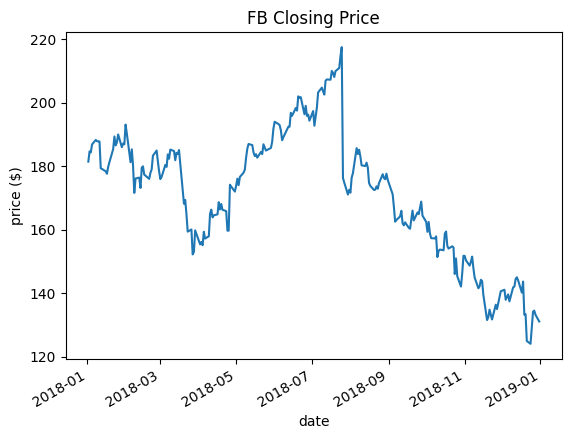

In [2]:
# titles & labels 
#
fb.close.plot()
plt.title('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

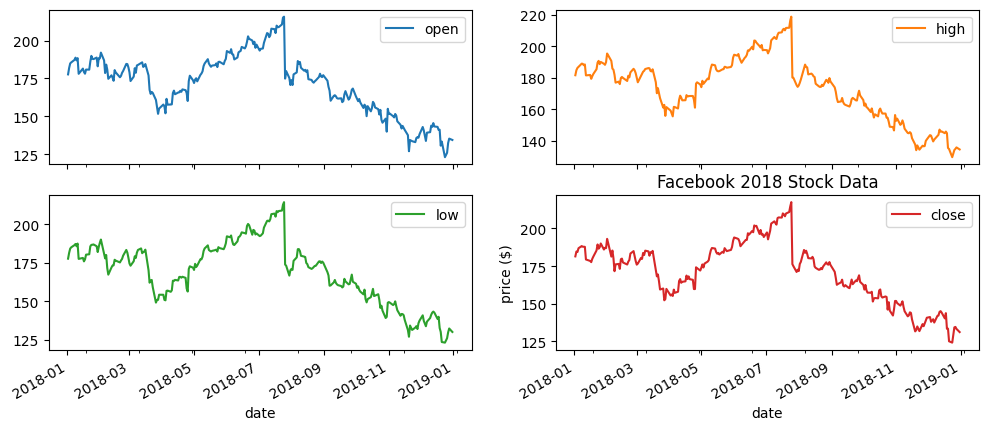

In [3]:
# plt.title & plt.label
#
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.ylabel('price ($)')

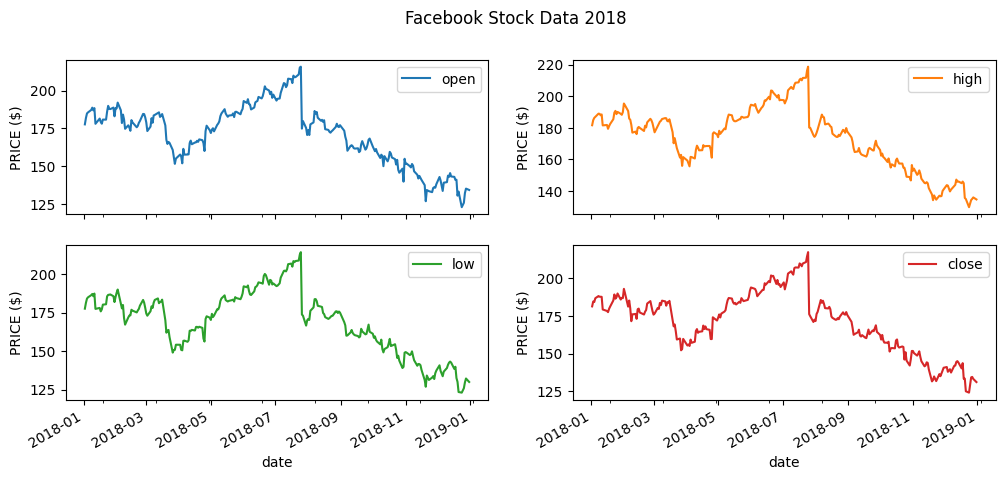

In [4]:
# subtitle & y axis label
#
axes = fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook Stock Data 2018')
for ax in axes.flatten():
    ax.set_ylabel('PRICE ($)')

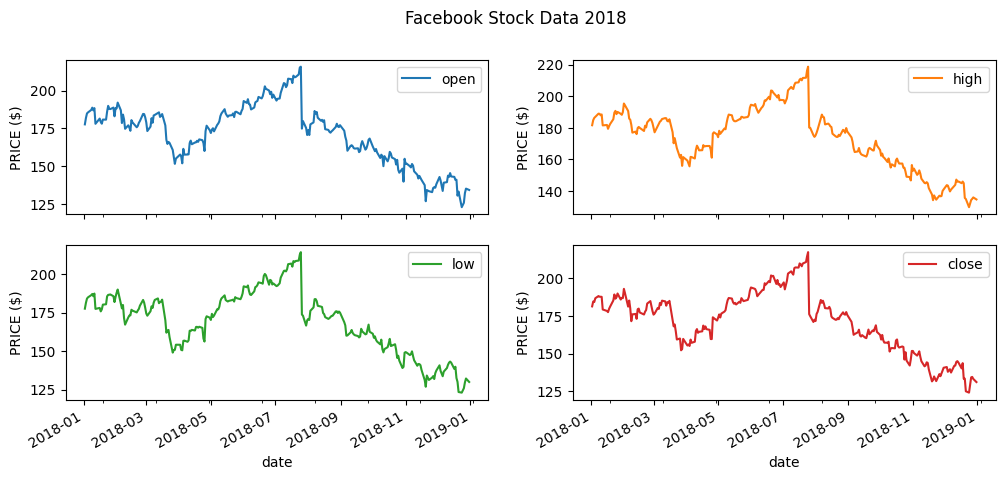

In [5]:
# flatten - axes - plot
#
axes = fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook Stock Data 2018')
for ax in axes.flatten():
    ax.set_ylabel('PRICE ($)')

## LEGENDS - PARAMETERS 

| Parameter | Purpose |
| --- | --- |
| `loc` | Specify the location of the legend |
| `bbox_to_anchor` | Used in conjunction with `loc` to specify legend location |
| `ncol` | Set the number of columns the labels will be broken into, default is 1 |
| `framealpha` | Control the transparency of the legend's background |
| `title` | Give the legend a title |

`plt.legend()` - adds a legend to  plot --------
SPECIFY LOCATION with `loc` parameter:

Text(0, 0.5, 'PRICE ($)')

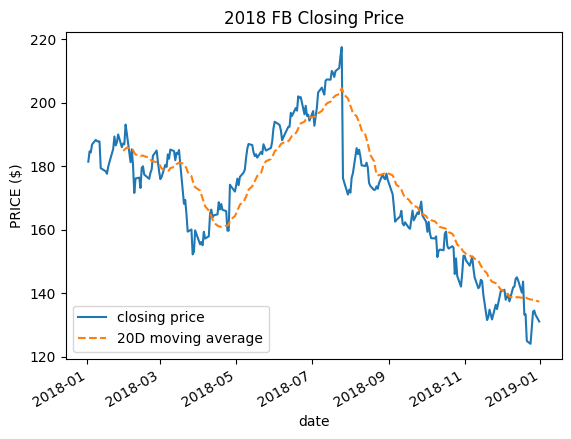

In [6]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'], 
    title='2018 FB Closing Price',
    label=['closing price', '20D moving average'],
    style=['-', '--']
)
plt.legend(loc='lower left')
plt.ylabel('PRICE ($)')

## POSSIBLE LOCATION STRINGS:

| Location String | Location Code |
| --- | --- |
| `'best'` | `0` |
| `'upper right'` | `1` |
| `'upper left'` | `2` |
| `'lower left'` | `3` |
| `'lower right'` | `4` |
| `'right'` | `5` |
| `'center left'` | `6` |
| `'center right'` | `7` |
| `'lower center'` | `8` |
| `'upper center'` | `9` |
| `'center'` | `10` |


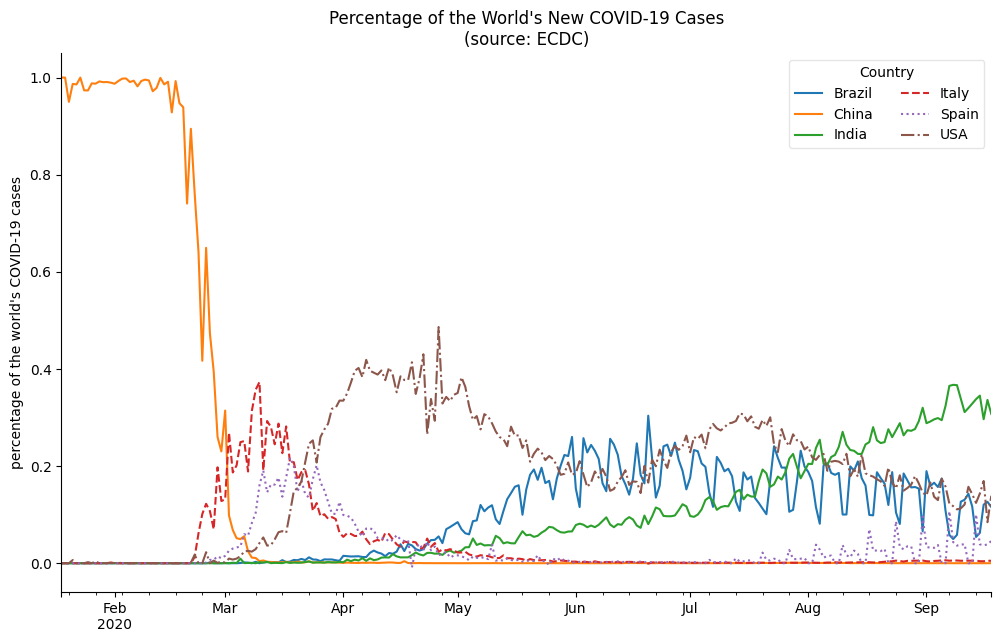

In [7]:
# style legend - remove top & right spines
#
new_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories', values='cases'
).fillna(0)
#
pct_new_cases = new_cases.apply(lambda x: x / new_cases.apply('sum', axis=1), axis=0)[
    ['Italy', 'China', 'Spain', 'USA', 'India', 'Brazil']
].sort_index(axis=1).fillna(0)
#
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)
#
ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

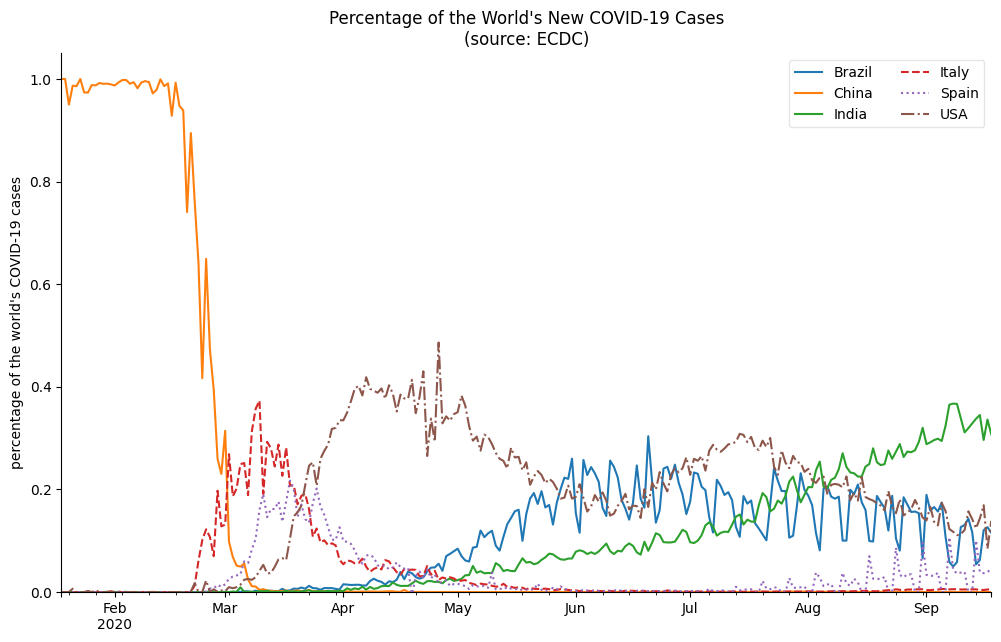

In [8]:
# formatting axes
#
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)
#
ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

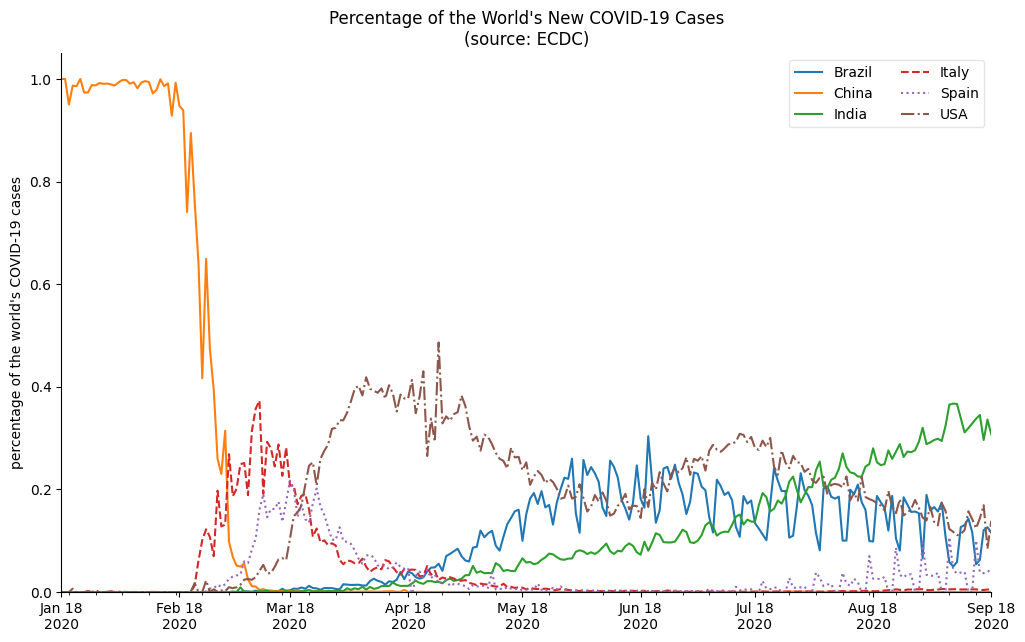

In [9]:
# axis ticks
#
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)
#
tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)
#
ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

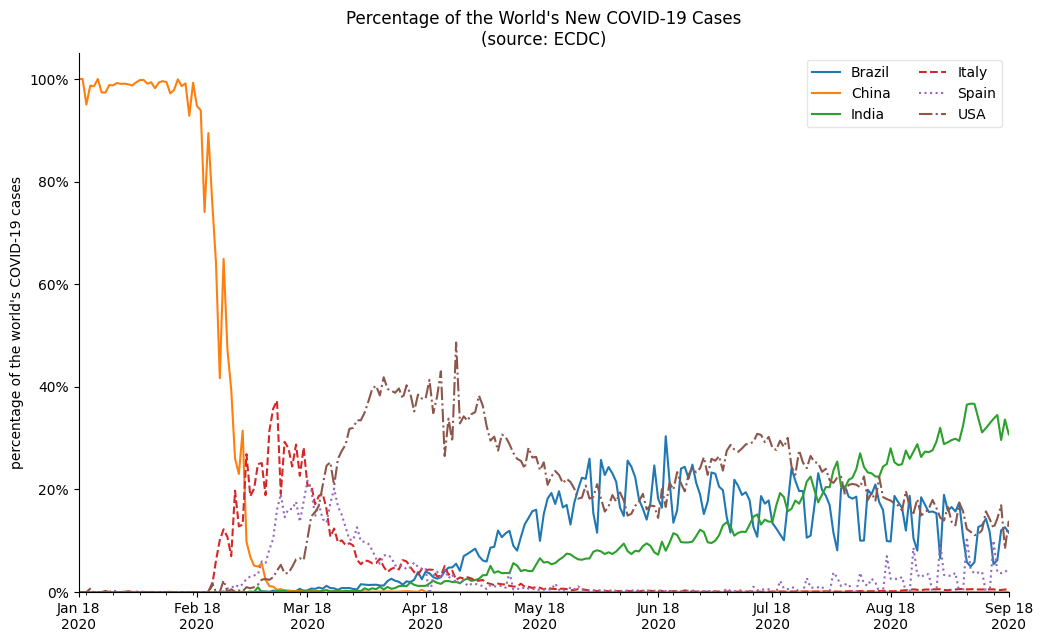

In [10]:
# matplotlib - ticker - percentformatter 
#
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)
#
tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)
#
ax.legend(title='', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

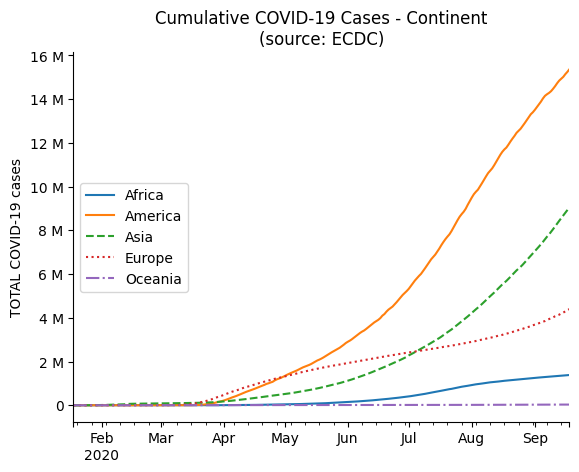

In [11]:
# EngFormatter - engineering notation to ticks
#
from matplotlib.ticker import EngFormatter
#
ax = covid.query('continentExp != "Other"').groupby([
    'continentExp', pd.Grouper(freq='1D')
]).cases.sum().unstack(0).apply('cumsum').plot(
    style=['-', '-', '--', ':', '-.'],
    title='Cumulative COVID-19 Cases - Continent\n(source: ECDC)'
)
#
ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='TOTAL COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

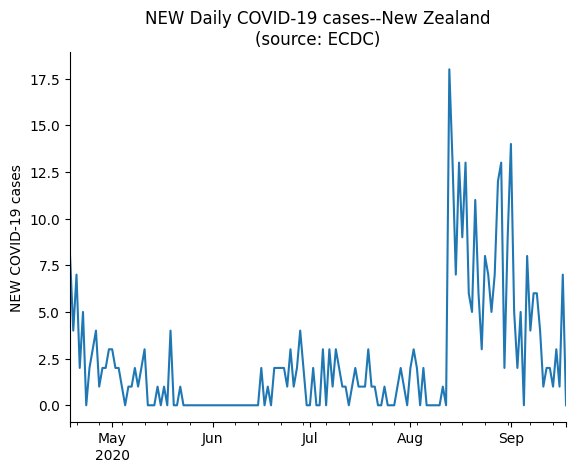

In [12]:
# multiple locator 
#
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='NEW Daily COVID-19 cases--New Zealand\n(source: ECDC)'
)
ax.set(xlabel='', ylabel='NEW COVID-19 cases')
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

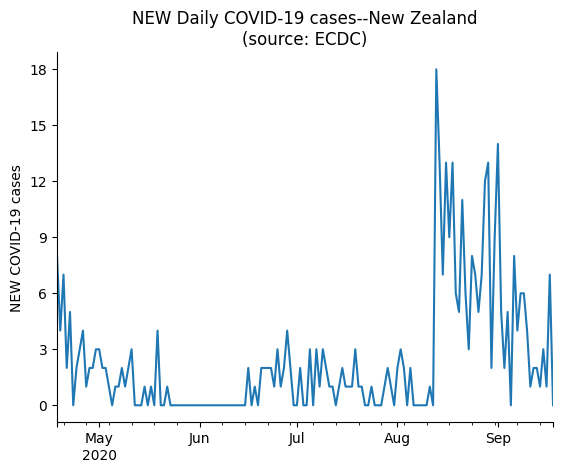

In [14]:
# ticks for all multiples 
#
from matplotlib.ticker import MultipleLocator
#
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='NEW Daily COVID-19 cases--New Zealand\n(source: ECDC)'
)
ax.set(xlabel='', ylabel='NEW COVID-19 cases')
ax.yaxis.set_major_locator(MultipleLocator(base=3))
#
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)